# DNN for AED with Keras/TensorFlow

Date: November 11, 2018 and February 27, 2019

Neural network: input MFCC to DNN

Classification of acoustic events:

- Piano music
- Framenco guitar music
- Classical guitar music
- Blues hars music
- Tin whistle music
- Silence

## Preparing data set for CNN

In [ ]:
DATASET_FOLDER = '../dataset/data_music'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(flatten=True)
shape = ds.shape
class_labels = ds.class_labels

((384, 1280), (216, 1280))

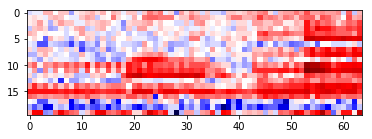

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[0].reshape(ds.shape)), cmap='seismic')
train_data.shape, test_data.shape

### DNN model

In [21]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Dense(128, input_dim=shape[0]*shape[1], activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(128, input_dim=shape[0]*shape[1], activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               163968    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 774       
Total params: 181,254
Trainable params: 181,254
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

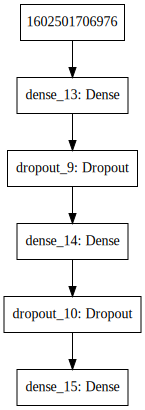

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training DNN

In [24]:
EPOCHS = 100
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 384 samples, validate on 216 samples
Epoch 1/100
384/384 [==============================] - 1s 2ms/step - loss: 1.3569 - acc: 0.5260 - val_loss: 0.7389 - val_acc: 0.7546
Epoch 2/100
384/384 [==============================] - 0s 169us/step - loss: 0.7054 - acc: 0.7656 - val_loss: 0.6852 - val_acc: 0.8102
Epoch 3/100
384/384 [==============================] - 0s 160us/step - loss: 0.4630 - acc: 0.8307 - val_loss: 0.6444 - val_acc: 0.7917
Epoch 4/100
384/384 [==============================] - 0s 164us/step - loss: 0.3091 - acc: 0.9089 - val_loss: 0.6551 - val_acc: 0.7685
Epoch 5/100
384/384 [==============================] - 0s 152us/step - loss: 0.2497 - acc: 0.9167 - val_loss: 0.7601 - val_acc: 0.8148
Epoch 6/100
384/384 [==============================] - 0s 167us/step - loss: 0.1751 - acc: 0.9297 - val_loss: 0.6763 - val_acc: 0.8148
Epoch 7/100
384/384 [==============================] - 0s 181us/step - loss: 0.1522 - acc: 0.9557 - val_loss: 0.6927 - val_acc: 0.8148
Epoch 8/100

Epoch 61/100
384/384 [==============================] - 0s 214us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 1.8227 - val_acc: 0.8194
Epoch 62/100
384/384 [==============================] - 0s 261us/step - loss: 0.0109 - acc: 0.9948 - val_loss: 1.8407 - val_acc: 0.8102
Epoch 63/100
384/384 [==============================] - 0s 322us/step - loss: 0.0049 - acc: 0.9974 - val_loss: 1.9428 - val_acc: 0.8056
Epoch 64/100
384/384 [==============================] - 0s 293us/step - loss: 0.0055 - acc: 0.9974 - val_loss: 1.8301 - val_acc: 0.7963
Epoch 65/100
384/384 [==============================] - 0s 231us/step - loss: 0.0192 - acc: 0.9948 - val_loss: 1.6522 - val_acc: 0.8148
Epoch 66/100
384/384 [==============================] - 0s 231us/step - loss: 0.0241 - acc: 0.9922 - val_loss: 1.7485 - val_acc: 0.7778
Epoch 67/100
384/384 [==============================] - 0s 238us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.7594 - val_acc: 0.8102
Epoch 68/100
384/384 [==========================

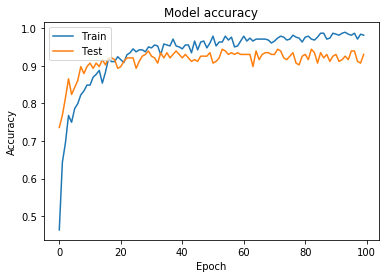

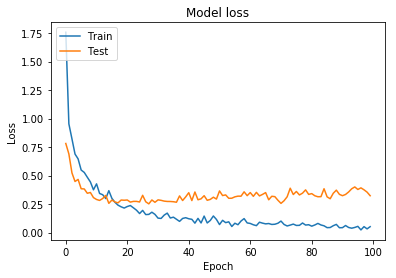

In [430]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [431]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/dnn_for_aed_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [432]:
del model
model = models.load_model(filename)

## Confirmation

In [433]:
import numpy as np
import matplotlib.pyplot as plt

In [434]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [435]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [436]:
class_labels

['piano',
 'classical_guitar',
 'framenco_guitar',
 'blues_harp',
 'tin_whistle',
 'silence']

In [437]:
(activations[-1][:10]*100).astype(int)

array([[100,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100],
       [  0,  99,   0,   0,   0,   0],
       [  0,   0,   0,  99,   0,   0],
       [  0,   0,  99,   0,   0,   0],
       [ 99,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100],
       [  0,   0,   0,  99,   0,   0],
       [100,   0,   0,   0,   0,   0],
       [ 99,   0,   0,   0,   0,   0]])

In [438]:
test_labels[:10].astype(int)

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])